In [1]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

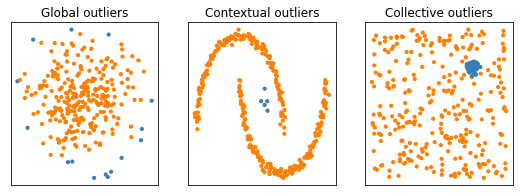

In [2]:
np.random.seed(0)

# Example settings
n_samples = 300
outliers_fraction = 0.05
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)

data1 = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0]
detector = IsolationForest(contamination=outliers_fraction, random_state=42)
detector.fit(data1)
y1 = detector.predict(data1)

data2 = 4. * (make_moons(n_samples=n_samples, noise=.03, random_state=0)[0] - np.array([0.5, 0.25]))
noise = np.random.normal([0, 0], 0.3, size=[5,2])
data2 = np.concatenate([data2, noise])
y2 = np.ones(len(data2), dtype=np.int)
y2[-5:] = -1

data3 = np.random.uniform(-1, 1, size=(n_samples, 2))
noise = np.random.normal([0.5, 0.5], 0.04, size=[70, 2])
data3 = np.concatenate([data3, noise])
y3 = np.ones(len(data3), dtype=np.int)
y3[-70:] = -1

colors = np.array(['#377eb8', '#ff7f00'])

plt.figure(figsize=(3*3, 3))
plt.subplot(1, 3, 1)
plt.scatter(data1[:, 0], data1[:, 1], s=10, color=colors[(y1 + 1) // 2])
plt.xticks(())
plt.yticks(())
plt.title('Global outliers')

plt.subplot(1, 3, 2)
plt.scatter(data2[:, 0], data2[:, 1], s=10, color=colors[(y2 + 1) // 2])
plt.xticks(())
plt.yticks(())
plt.title('Contextual outliers')

plt.subplot(1, 3, 3)
plt.scatter(data3[:, 0], data3[:, 1], s=10, color=colors[(y3 + 1) // 2])
plt.xticks(())
plt.yticks(())
plt.title('Collective outliers')

plt.savefig('../imgs/outlier_examples.pdf', format='pdf', dpi=1200, bbox_inches='tight')

## Tutorial Question 2 - LOF

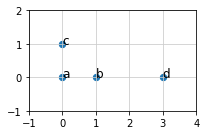

In [3]:
data = np.array([[0,0],[1,0],[0,1],[3,0]])
labels = ['a', 'b', 'c', 'd']


plt.figure(figsize=(3, 4))
plt.scatter(data[:, 0], data[:, 1], s=40)

for i, lbl in enumerate(labels):
    plt.annotate(
        lbl, 
        (data[i, 0], data[i, 1]), 
        xycoords='data', 
        fontsize=12,
    )

plt.axis([-1, 4, -1, 2], 'equal')
plt.grid(color='0.8')
plt.gca().set_aspect("equal")
plt.savefig('../imgs/outlier_lof.pdf', format='pdf', dpi=1200, bbox_inches='tight')

In [4]:
from sklearn.neighbors import LocalOutlierFactor

In [5]:
clf = LocalOutlierFactor(n_neighbors=3, metric='manhattan',novelty=False)
pred = clf.fit_predict(data)
print(pred)
print(clf.negative_outlier_factor_)

[1 1 1 1]
[-1.04377104 -1.18148148 -0.90606061 -0.90606061]


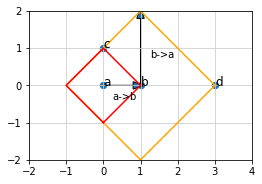

In [6]:
labels = ['a', 'b', 'c', 'd']
dist_a_x = [0, -1, 0, 1, 0]
dist_a_y = [-1, 0, 1, 0, -1]

dist_b_x = [1, -1, 1, 3, 1]
dist_b_y = [-2, 0, 2, 0, -2]

plt.figure(figsize=(4, 4))
plt.scatter(data[:, 0], data[:, 1], s=40)

for i, lbl in enumerate(labels):
    plt.annotate(
        lbl, 
        (data[i, 0], data[i, 1]), 
        xycoords='data', 
        fontsize=12,
    )

plt.plot(dist_b_x, dist_b_y, c='orange')
plt.plot(dist_a_x, dist_a_y, c='red')

plt.arrow(0, 0, 0.8, 0, shape='full', head_width=0.2)
plt.annotate('a->b', (0.25, -0.4))

plt.arrow(1, 0, 0, 1.8, shape='full', head_width=0.2)
plt.annotate('b->a', (1.25, 0.75))

plt.axis([-2, 4, -2, 2], 'equal')
plt.grid(color='0.8')
plt.gca().set_aspect("equal")
plt.savefig('../imgs/reachdist_ab.pdf', format='pdf', dpi=1200, bbox_inches='tight')